<a href="https://colab.research.google.com/github/regiltcj/neural-network/blob/nn_andrej_karpathy/nn_andrej_karpathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [3]:
class Value():
  def __init__(self, data, prev=(), op="", label=""):
    self.data = data
    self._prev = set(prev)
    self._op = op
    self.label = label
    self.grad = 0
    self._backward = lambda None

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    result = self.data + other.data
    out = Value(result,(self, other),"+")

    def backward():
      self.grad = out.grad
      other.grad = out.grad
    out._backward = backward

    return out

  def __mul__(self, other):
    result = self.data * other.data
    out = Value(result,(self, other), "*")

    def backward():
      self.grad = out.grad * other.data
      other.grad = out.grad * self.data
    out._backward = backward

    return out

  def tanh(self):
    result = np.tanh(self.data)
    out = Value(result, (self, ), "tanh")

    def backward():
      self.grad = out.grad * (1- out.data**2)
    out._backward = backward

In [4]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

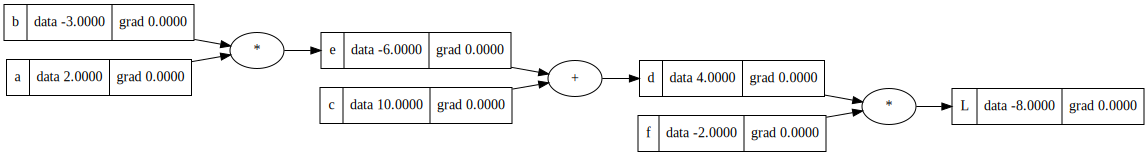

In [5]:
draw_dot(L)

In [ ]:
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = "x1w1"
x2w2 = x2*w2; x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1x2w2"
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label = "o"